# Task 1.7 Creating Network Visualizations
#### 1. Install Libraries
#### 2. Import relationship data
#### 3. Create a network object from the countries relationships dataframe
#### 4. Create a static network graph using only NetworkX
#### 5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file
#### 6. Apply the Leiden algorithm to detect any communities within the countries
#### 7. Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell
#### 8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.
#### 9. Save centrality measures

### 1. Install Libaries

In [33]:
#Install Libraries
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

### 2. Import relationship data

In [2]:
# Import relationship_df
relationship_df = pd.read_csv('20th_century_relationship.csv')

In [3]:
relationship_df

,source,target,value
0,France,Russia,1
1,Russia,Germany,1
2,Germany,Austria,1
3,Austria,Hungary,1
4,Hungary,Bulgaria,1
...,...,...,...
116,Italy,Greece,1
117,Greece,Britain,1
118,Italy,Japan,1
119,Romania,Russia,1


### 3. Create a network object from the countries relationships dataframe

In [4]:
print(relationship_df.columns)

Index(['source', 'target', 'value'], dtype='object')


In [5]:
# Removing extra space in 'target' column name
relationship_df.columns = relationship_df.columns.str.strip()

In [6]:
print(relationship_df.columns)

Index(['source', 'target', 'value'], dtype='object')


In [7]:
# Creating "value" column in relationship_df
relationship_df['value'] = relationship_df.groupby(['target', 'source'])['target'].transform('count')

In [8]:
relationship_df

,source,target,value
0,France,Russia,1
1,Russia,Germany,1
2,Germany,Austria,1
3,Austria,Hungary,1
4,Hungary,Bulgaria,1
...,...,...,...
116,Italy,Greece,1
117,Greece,Britain,1
118,Italy,Japan,1
119,Romania,Russia,1


In [9]:
# Eliminate duplicate rows
relationship_df2 = relationship_df.drop_duplicates();
relationship_df2

,source,target,value
0,France,Russia,1
1,Russia,Germany,1
2,Germany,Austria,1
3,Austria,Hungary,1
4,Hungary,Bulgaria,1
...,...,...,...
116,Italy,Greece,1
117,Greece,Britain,1
118,Italy,Japan,1
119,Romania,Russia,1


### 4. Create a static network graph using only NetworkX

In [10]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df2, 
                            source = "source", 
                            target = "target",
                            edge_attr = "value", 
                            create_using = nx.Graph())

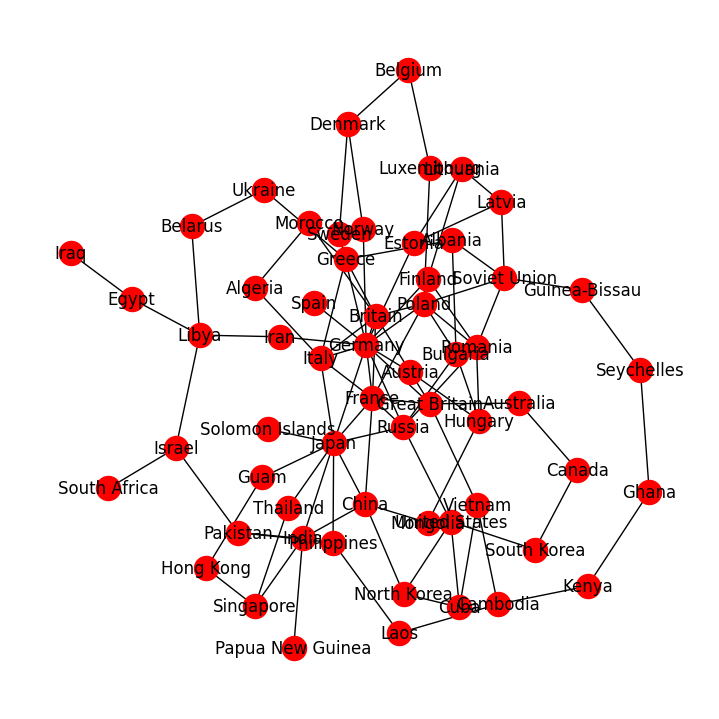

In [11]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [12]:
h.savefig('networkx_plt_20th_century.png')

### 5. Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file

In [13]:
# Define Net Object
net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century_pyvis.html")

20th_century_pyvis.html


### 6. Apply the Leiden algorithm to detect any communities within the countries

In [14]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'wurlitzer', 'graph_tool', 'infomap'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [15]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [16]:
new_com = coms.to_node_community_map()

In [17]:
new_com

defaultdict(list,
            {'Russia': [0],
             'Austria': [0],
             'Hungary': [0],
             'Bulgaria': [0],
             'Poland': [0],
             'Soviet Union': [0],
             'Estonia': [0],
             'Latvia': [0],
             'Lithuania': [0],
             'Finland': [0],
             'Albania': [0],
             'Romania': [0],
             'Ukraine': [1],
             'Belarus': [1],
             'Libya': [1],
             'Egypt': [1],
             'Iraq': [1],
             'Philippines': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Iran': [1],
             'Laos': [1],
             'Japan': [2],
             'China': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Hong Kong': [2],
             'Guam': [2],
             'Solomon Islands': [2],
             'India': [2],
             'Papua New Guinea': [2],
             'Mongolia': [2],
          

In [18]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k, v in new_com.items()}

In [19]:
dict_com

{'Russia': 0,
 'Austria': 0,
 'Hungary': 0,
 'Bulgaria': 0,
 'Poland': 0,
 'Soviet Union': 0,
 'Estonia': 0,
 'Latvia': 0,
 'Lithuania': 0,
 'Finland': 0,
 'Albania': 0,
 'Romania': 0,
 'Ukraine': 1,
 'Belarus': 1,
 'Libya': 1,
 'Egypt': 1,
 'Iraq': 1,
 'Philippines': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Iran': 1,
 'Laos': 1,
 'Japan': 2,
 'China': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Hong Kong': 2,
 'Guam': 2,
 'Solomon Islands': 2,
 'India': 2,
 'Papua New Guinea': 2,
 'Mongolia': 2,
 'France': 3,
 'Germany': 3,
 'Italy': 3,
 'Spain': 3,
 'Britain': 3,
 'Great Britain': 3,
 'Greece': 3,
 'Morocco': 3,
 'Algeria': 3,
 'North Korea': 4,
 'Cuba': 4,
 'United States': 4,
 'South Korea': 4,
 'Canada': 4,
 'Australia': 4,
 'Cambodia': 5,
 'Kenya': 5,
 'Ghana': 5,
 'Seychelles': 5,
 'Guinea-Bissau': 5,
 'Vietnam': 5,
 'Luxembourg': 6,
 'Belgium': 6,
 'Denmark': 6,
 'Norway': 6,
 'Sweden': 6}

In [20]:
# Rerun network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_leiden.html")

20th_century_leiden.html


### 7. Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell

#### Q7 Comment: The two most noticable nodes, Germany/Hungary and Japan suggests their prominent roles in historical events of the 20th century such as World War I/II and the Cold war.  The colors most likely indicate different types of relationships such as alliances, conflicts, or geopolitical influence.  For example the US has always been a close ally to Canada and South Korea but it also shows a connection to Cuba and North Korea which to this day the US is not an ally. 

### 8. Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs

In [21]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.13793103448275862,
 'Russia': 0.10344827586206896,
 'Germany': 0.24137931034482757,
 'Austria': 0.034482758620689655,
 'Hungary': 0.06896551724137931,
 'Bulgaria': 0.06896551724137931,
 'Italy': 0.10344827586206896,
 'Spain': 0.017241379310344827,
 'Britain': 0.12068965517241378,
 'Poland': 0.12068965517241378,
 'Soviet Union': 0.08620689655172414,
 'Estonia': 0.05172413793103448,
 'Latvia': 0.05172413793103448,
 'Lithuania': 0.05172413793103448,
 'Finland': 0.05172413793103448,
 'Luxembourg': 0.034482758620689655,
 'Belgium': 0.034482758620689655,
 'Denmark': 0.05172413793103448,
 'Norway': 0.034482758620689655,
 'Sweden': 0.034482758620689655,
 'Great Britain': 0.08620689655172414,
 'Greece': 0.06896551724137931,
 'Albania': 0.05172413793103448,
 'Ukraine': 0.034482758620689655,
 'Belarus': 0.034482758620689655,
 'Libya': 0.06896551724137931,
 'Egypt': 0.034482758620689655,
 'Iraq': 0.017241379310344827,
 'Japan': 0.1724137931034483,
 'Morocco': 0.034482758620689655,
 'A

In [22]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [23]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

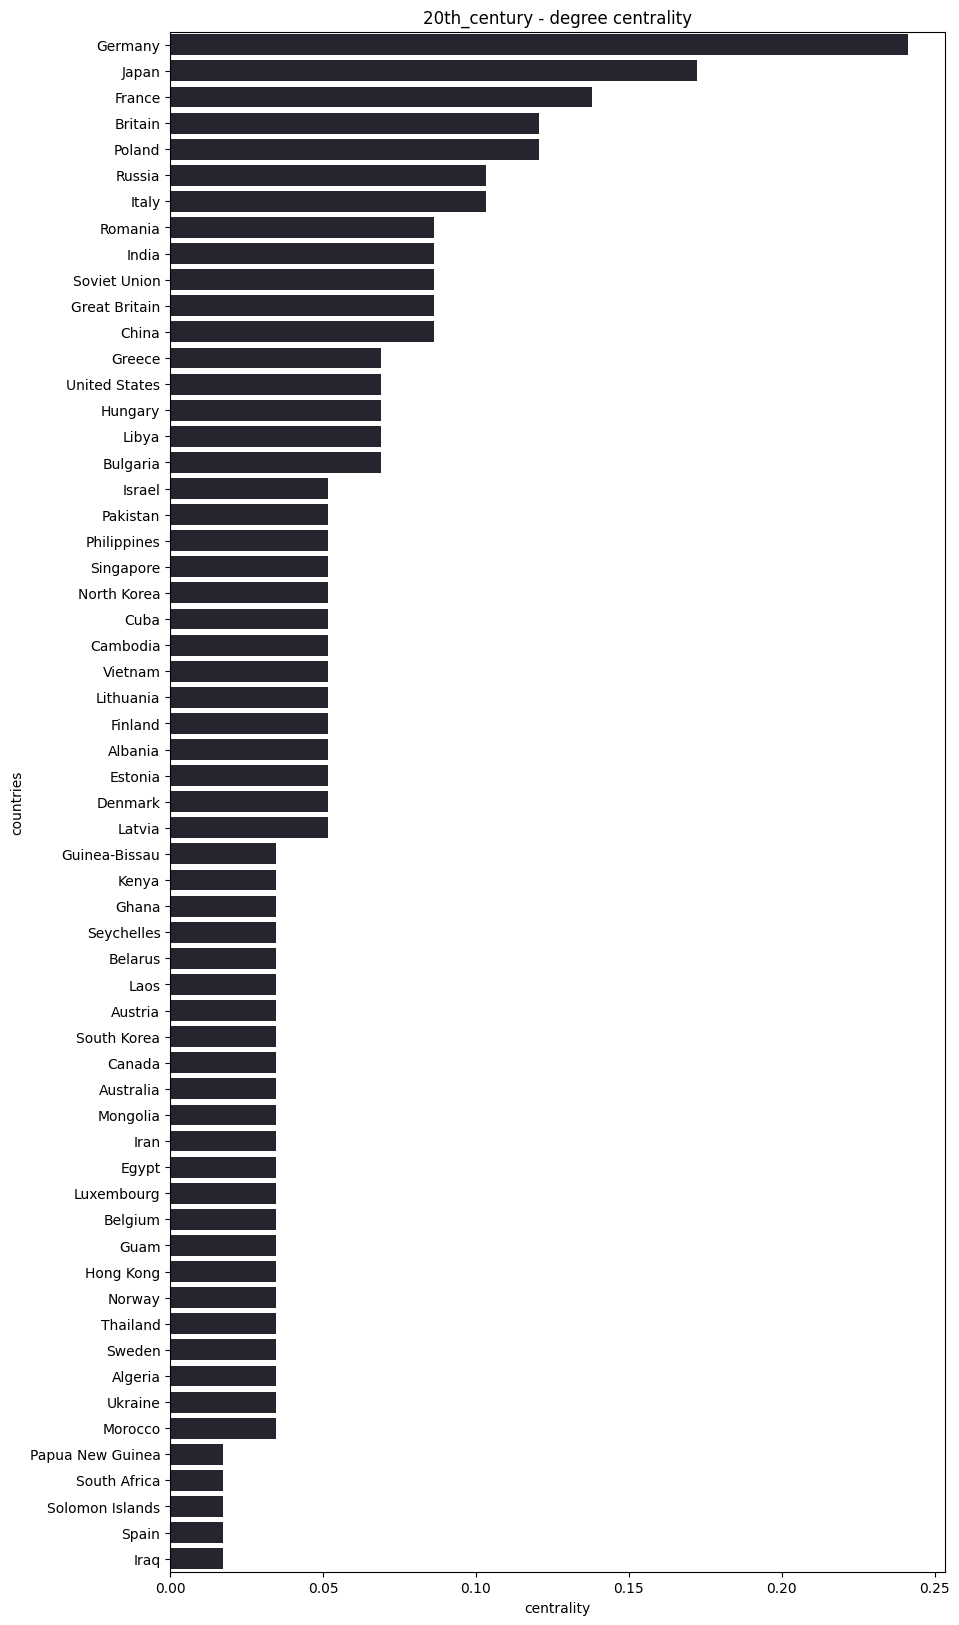

In [43]:
# Plot the degree centrality
plt.figure(figsize = (10, 20))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th_century - degree centrality")

#### Q8 Comment for degree centrality: Germany has the highest degree centrality which makes sense since it played a central role with other countries during major 20th-century events.  Japan, France, and Britain follow closely behind Germany in terms of degree centrality. Japan’s influence is tied to its activities in Asia and its alliances during World War II. France and Britain, played substantial roles in global politics and military conflicts. 

In [25]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [26]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

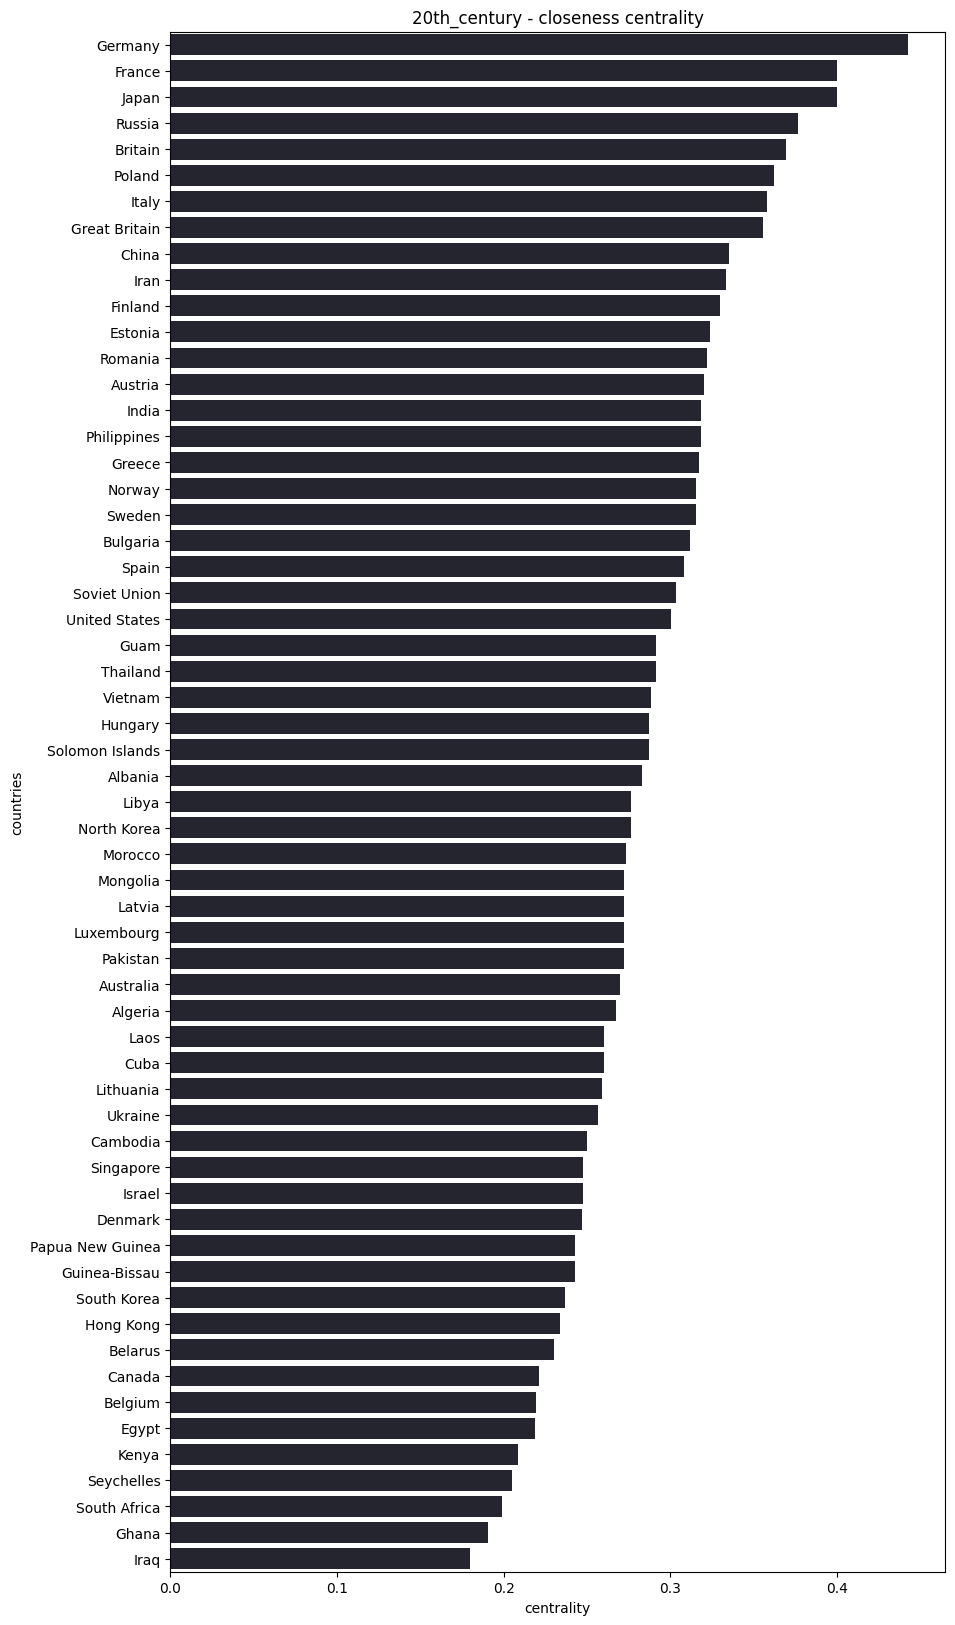

In [27]:
plt.figure(figsize = (10, 20))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th_century - closeness centrality")

#### Q8 Comment for closeness centrality:  Germany, France, and Japan have the highest closeness centrality, indicating that these countries were the most central and well-connected within the global network of the 20th century. This suggests they had significant influence and connectivity with other countries, potentially indicating their political, economic, or strategic importance during this time period.  On the other hand, countries like Iraq, South Africa, and Ghana have the lowest closeness centrality, suggesting that these countries had less involvment in the global network, with less direct influence or connectivity compared to the others.

In [28]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [29]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

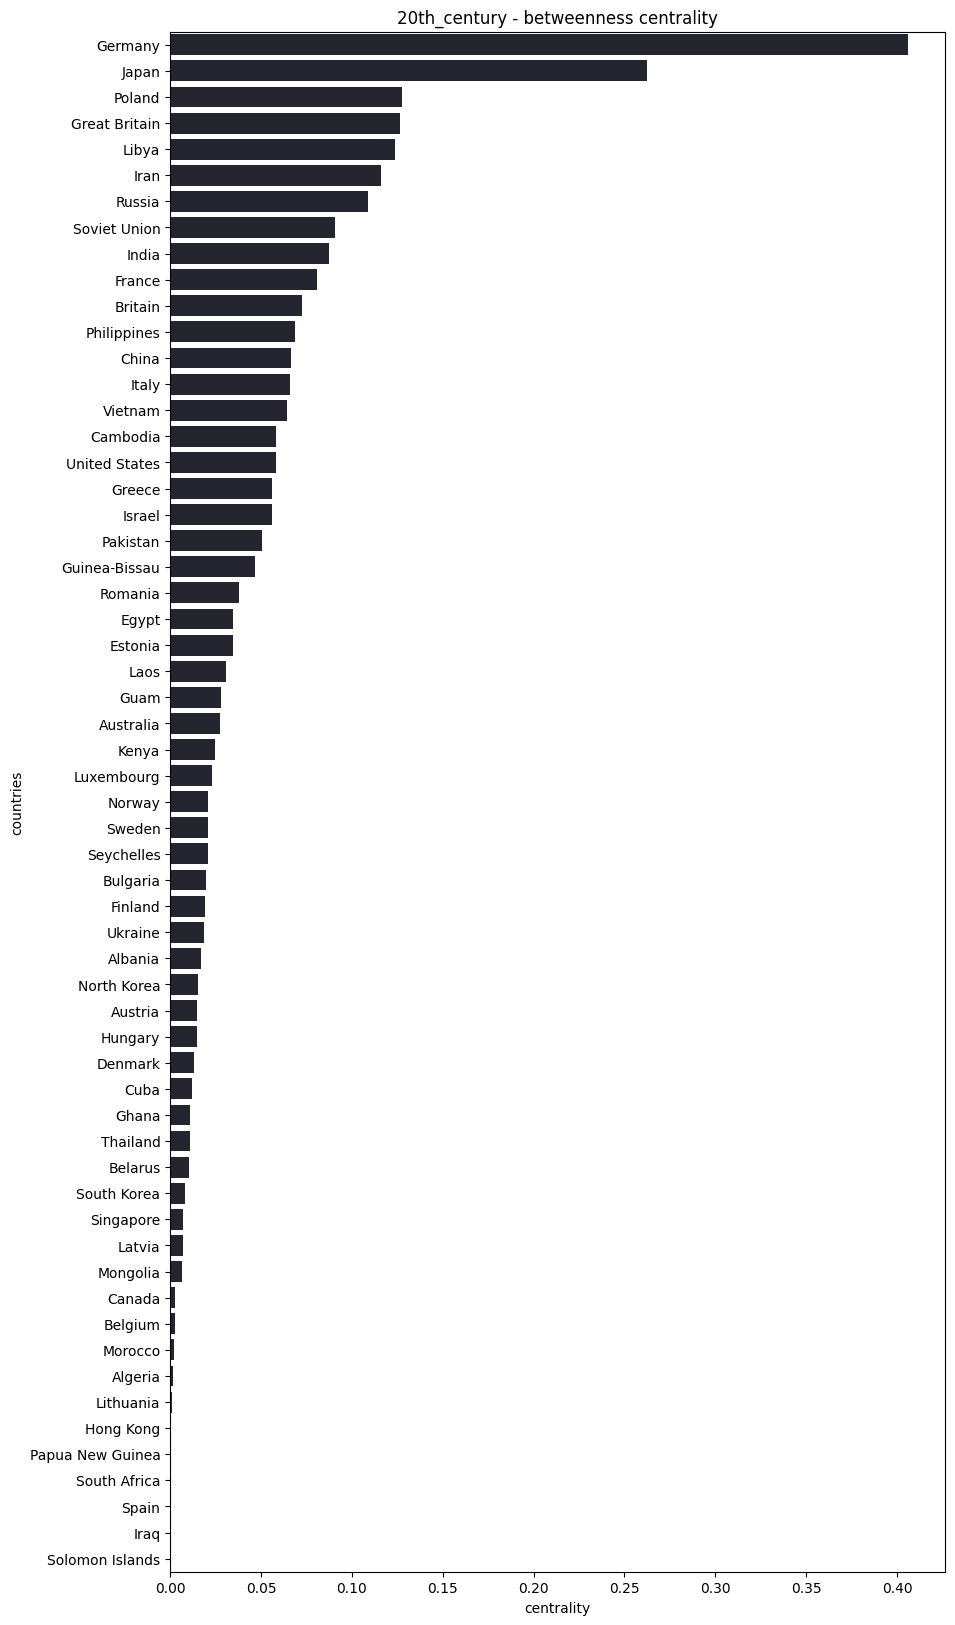

In [30]:
plt.figure(figsize = (10, 20))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th_century - betweenness centrality")

### 8. Save centrality measures 

#### Comments for betweenness centrality:  Germany has the highest betweenness centrality, indicating that it played a critical role in the global network, possibly acting as a key intermediary or influencer among other countries during the 20th century. This high centrality reflects Germany's significant impact on global affairs, especially considering its role in the two World Wars and its influence during the Cold War era.  Japan, Poland, Great Britain, and the Soviet Union also show high values of betweenness centrality. These countries were central players in major global events such as World War II, the Cold War.  The United States is relatively lower in comparison to Germany, which is surprising given its global presence throughout the 20th century.

In [31]:
# Saving centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [32]:
#Saving updated 20th_century_relationship.csv
relationship_df2.to_csv('20th_century_relationship.csv', index=False)